### Hamoye_Datascience_Internship_ 2021 stageB- Regression model


# 1. 
In linear regression, L2 regularization is equivalent to imposing a:
  Guassian Prior
  
# 2.
Cross Validation
    Guaranteed to prevent overfitting.
    
# 3.
Ridge Regression
    Reduces variance at the expense of higher bias
# 4.
In the different terms of the bias-variance tradeoff, which of the following is substantially more harmful to the test error than the training error?
    Bias
# 5.
What can you use to find the best fit line for data in Linear Regression
    Least Square Error
# 6.
Which of the following sentence is true about outliers in Linear Regression:
    Lnear regression is sensitive to outliers
# 7.
How many coefficients do you need to estimate a simple linear regression model (One independent variable)?
    1
# 8.
Adding more basis functions in a linear model:
    Doesn’t affect bias and variance
# 9.
A best fit line relating X and Y has a R-Squared value of 0.75. How do I interpret this information?
    The correlation between X and Y is 0.75
# 10.
The Lasso can be interpreted as least-squares linear regression where:
    Weights are regularized with the L1 and L2 norm
# 11.

Which of these is not an assumption of Linear Regression?
    Multivariate normality

In [1]:
#necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the dataset
df = pd.read_csv("data/energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
plt.style.available;

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
df['year'] = df['date'].str[:4]
df['month'] = df['date'].str[5:7]
df['day'] = df['date'].str[8:10]
df['hour'] = df['date'].str[11:13]
df['minute'] = df['date'].str[14:16]
df['seconds'] = df['date'].str[17:19]

In [6]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour,minute,seconds
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,63.000000,5.3,13.275433,13.275433,2016,01,11,17,00,00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,59.166667,5.2,18.606195,18.606195,2016,01,11,17,10,00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,55.333333,5.1,28.642668,28.642668,2016,01,11,17,20,00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,51.500000,5.0,45.410389,45.410389,2016,01,11,17,30,00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,47.666667,4.9,10.084097,10.084097,2016,01,11,17,40,00


In [7]:
df.drop('date', axis=1, inplace=True)

In [8]:
df.drop('lights', axis=1, inplace=True)

In [9]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour,minute,seconds
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,63.000000,5.3,13.275433,13.275433,2016,01,11,17,00,00
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,59.166667,5.2,18.606195,18.606195,2016,01,11,17,10,00
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,55.333333,5.1,28.642668,28.642668,2016,01,11,17,20,00
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,51.500000,5.0,45.410389,45.410389,2016,01,11,17,30,00
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,47.666667,4.9,10.084097,10.084097,2016,01,11,17,40,00


In [10]:
df.shape

(19735, 33)

In [11]:
sample_df = df[['rv1', 'rv2']].sample(15, random_state=42)

<AxesSubplot:xlabel='rv1', ylabel='rv2'>

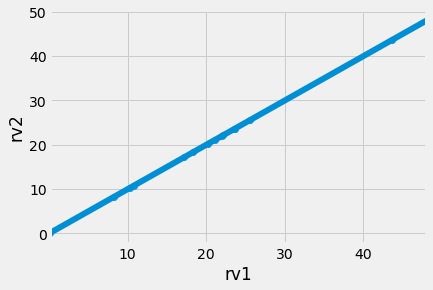

In [12]:
sns.regplot(x='rv1', y='rv2', data=sample_df)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)

In [15]:
x = normalized_df.drop('Appliances', axis=1)
y = normalized_df['Appliances']

In [16]:
x.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour,minute,seconds
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.953846,0.538462,0.265449,0.265449,0.0,0.0,0.333333,0.73913,0.0,0.0
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.894872,0.533937,0.372083,0.372083,0.0,0.0,0.333333,0.73913,0.2,0.0
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.835897,0.529412,0.572848,0.572848,0.0,0.0,0.333333,0.73913,0.4,0.0
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.776923,0.524887,0.908261,0.908261,0.0,0.0,0.333333,0.73913,0.6,0.0
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.717949,0.520362,0.201611,0.201611,0.0,0.0,0.333333,0.73913,0.8,0.0


In [17]:
y.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: Appliances, dtype: float64

In [18]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [19]:
X_train.shape

(13814, 32)

In [20]:
#model training
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [21]:
from sklearn.metrics import r2_score

In [22]:
y_preds = model.predict(X_test)

In [23]:
r2 = r2_score(y_test, y_preds)
print(round(r2, 2))

0.15


### What is the Mean Absolute Error (in two decimal places)?

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mae = mean_squared_error(y_test,y_preds)
print(round(mae, 2))

0.01


### What is the Residual Sum of Squares (in two decimal places)?

In [26]:
rss = np.sum(np.square(y_test-y_preds))
print(round(rss, 2))

45.16


### What is the Root Mean Squared Error (in three decimal places)?

In [27]:
rmse = np.sqrt(mean_squared_error(y_test,y_preds))
print(round(rmse, 3))

0.087


### What is the Coefficient of Determination (in two decimal places)?

In [28]:
rs = r2_score(y_test,y_preds)
print(round(rs, 2))

0.15


### Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [29]:
from sklearn.linear_model import Ridge

In [33]:
clf = Ridge(alpha=0.4)
clf.fit(X_train,y_train)

Ridge(alpha=0.4)

In [31]:
y_pre = clf.predict(X_test)

### What is the new RMSE with the Lasso Regression (in 3 decimal places)?

In [34]:
rmse = np.sqrt(mean_squared_error(y_test,y_pre))
print(round(rmse, 3))

0.087
